# CSE185 Group 9 Project--Code for figure 5a

### Dataset:
[GSE132326](https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE132326)

[GSE132329](https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE132329)

In [1]:
# Load R to run DESeq2
%load_ext rpy2.ipython
import warnings
warnings.filterwarnings('ignore')

In [2]:
%%R
# Load library
library("DESeq2")
## For Kras.ADR_RNA vs Normal_RNA in GSE132326
# Read renamed output
featurecountsKras <- read.csv("GSE132326_Alonso-Curbelo_RNASeq_SET1.csv")
# Define condition for DESeq2
column.from = which(colnames(featurecountsKras) == "ID") + 1
column.end  = which(colnames(featurecountsKras) == "Gene_name") - 1
coldata = data.frame(condition = c('Normal_RNA',
                                   'Normal_RNA',
                                   'Normal_RNA',
                                   'Normal_RNA',
                                   'RegADM_RNA',
                                   'RegADM_RNA',
                                   'RegADM_RNA',
                                   'RegADM_RNA',
                                   'RegADM_RNA',
                                   'Kras._RNA',
                                   'Kras._RNA',
                                   'Kras._RNA',
                                   'Kras.ADR_RNA',
                                   'Kras.ADR_RNA',
                                   'Kras.ADR_RNA',
                                   'Kras.ADR_RNA',
                                   'PDAC_RNA',
                                   'PDAC_RNA',
                                   'PDAC_RNA'
                                  ), stringsAsFactors = TRUE)
ddsKras <- 
DESeqDataSetFromMatrix(countData = featurecountsKras[, column.from:column.end],
                       colData = coldata,
                       design = ~condition)
rownames(ddsKras) <- featurecountsKras$Gene_name
# Create subset of DESeqDataSet for comparison
ddsKras.kras <- ddsKras[ , ddsKras$condition %in% c("Kras.ADR_RNA", "Normal_RNA") ]
ddsKras.kras$condition <- droplevels(ddsKras.kras$condition)
# Perform DESeq
ddsKras.kras <- DESeq(ddsKras.kras)
# Export result to csv for plotting in python
resKras <- results( ddsKras.kras, contrast = c("condition", "Kras.ADR_RNA", "Normal_RNA") )
resKras
write.csv(as.data.frame(resKras), file="resKras.csv")

R[write to console]: Loading required package: S4Vectors

R[write to console]: Loading required package: stats4

R[write to console]: Loading required package: BiocGenerics

R[write to console]: Loading required package: parallel

R[write to console]: 
Attaching package: ‘BiocGenerics’


R[write to console]: The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB


R[write to console]: The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


R[write to console]: The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, 

In [3]:
%%R
## For Kras.ADR.shBrd4.1448_RNA vs Kras.ADR.shRen.713_RNA in GSE132329
# Read renamed output
featurecountsBrd4 <- read.csv("GSE132329_Alonso-Curbelo_RNASeq_SET2.csv")
# Define condition for DESeq2
column.from = which(colnames(featurecountsBrd4) == "ID") + 1
column.end  = which(colnames(featurecountsBrd4) == "Gene_name") - 1
coldata = data.frame(condition = c('Normal.shRen.713_RNA',
                                   'Normal.shRen.713_RNA',
                                   'Normal.shRen.713_RNA',
                                   'RegADM.shRen.713_RNA',
                                   'RegADM.shRen.713_RNA',
                                   'RegADM.shRen.713_RNA',
                                   'RegADM.shBrd4.1448_RNA',
                                   'RegADM.shBrd4.1448_RNA',
                                   'RegADM.shBrd4.1448_RNA',
                                   'Kras.ADR.shRen.713_RNA',
                                   'Kras.ADR.shRen.713_RNA',
                                   'Kras.ADR.shRen.713_RNA',
                                   'Kras.ADR.shBrd4.1448_RNA',
                                   'Kras.ADR.shBrd4.1448_RNA',
                                   'Kras.ADR.shBrd4.1448_RNA',
                                   'Kras.ADR.shBrd4.552_RNA',
                                   'Kras.ADR.shBrd4.552_RNA',
                                   'Kras.ADR.shBrd4.552_RNA'
                                  ), stringsAsFactors = TRUE)
ddsBrd4 <- 
DESeqDataSetFromMatrix(countData = featurecountsBrd4[, column.from:column.end],
                       colData = coldata,
                       design = ~condition)
rownames(ddsBrd4) <- featurecountsBrd4$Gene_name
# Create subset of DESeqDataSet for comparison
ddsBrd4 <- ddsBrd4[ , ddsBrd4$condition %in% c("Kras.ADR.shBrd4.1448_RNA", "Kras.ADR.shRen.713_RNA") ]
ddsBrd4$condition <- droplevels(ddsBrd4$condition)
# Perform DESeq
ddsBrd4 <- DESeq(ddsBrd4)
# Export result to csv for plotting in python
resBrd4 <- results( ddsBrd4, contrast = c("condition", "Kras.ADR.shBrd4.1448_RNA", "Kras.ADR.shRen.713_RNA") )
resBrd4
write.csv(as.data.frame(resBrd4), file="resBrd4.csv")
# Check package version
sessionInfo()

R[write to console]: estimating size factors

R[write to console]: estimating dispersions

R[write to console]: gene-wise dispersion estimates

R[write to console]: mean-dispersion relationship

R[write to console]: final dispersion estimates

R[write to console]: fitting model and testing



R version 4.0.5 (2021-03-31)
Platform: x86_64-apple-darwin13.4.0 (64-bit)
Running under: macOS 12.4

Matrix products: default
LAPACK: /Users/haoranzhang/miniconda3/envs/scRNAseq/lib/libopenblasp-r0.3.18.dylib

locale:
[1] en_US.UTF-8/en_US.UTF-8/en_US.UTF-8/C/en_US.UTF-8/en_US.UTF-8

attached base packages:
 [1] parallel  stats4    tools     stats     graphics  grDevices utils    
 [8] datasets  methods   base     

other attached packages:
 [1] DESeq2_1.30.1               SummarizedExperiment_1.20.0
 [3] Biobase_2.50.0              MatrixGenerics_1.2.1       
 [5] matrixStats_0.61.0          GenomicRanges_1.42.0       
 [7] GenomeInfoDb_1.26.7         IRanges_2.24.1             
 [9] S4Vectors_0.28.1            BiocGenerics_0.36.1        

loaded via a namespace (and not attached):
 [1] genefilter_1.72.1      locfit_1.5-9.4         tidyselect_1.1.1      
 [4] purrr_0.3.4            splines_4.0.5          lattice_0.20-45       
 [7] generics_0.1.1         colorspace_2.0-2       vctrs_0

In [4]:
# import packages for plotting
import pandas as pd
import matplotlib.pyplot as plt
from adjustText import adjust_text

In [5]:
# Read output from DESeq2
Kras = pd.read_csv("resKras.csv")
Brd4 = pd.read_csv("resBrd4.csv")

In [6]:
Kras.rename(columns={'Unnamed: 0':'gene','log2FoldChange': 'log2FoldChangeKras'}, inplace=True)

In [7]:
Brd4.rename(columns={'Unnamed: 0':'gene','log2FoldChange': 'log2FoldChangeBrd4'}, inplace=True)

In [8]:
display(Kras,Brd4)

,gene,baseMean,log2FoldChangeKras,lfcSE,stat,pvalue,padj
0,Gnai3,271.522465,0.389347,0.303682,1.282087,1.998120e-01,0.349789
1,Pbsn,0.043976,-2.867003,3.503122,-0.818414,4.131210e-01,NaN
2,Cdc45,12.746731,-0.425256,0.752280,-0.565290,5.718769e-01,0.715053
3,H19,101.367440,3.889724,0.752091,5.171878,2.317526e-07,0.000003
4,Scml2,1.082772,1.546772,1.741443,0.888213,3.744264e-01,NaN
...,...,...,...,...,...,...,...
53460,AC107711.6,0.000000,NaN,NaN,NaN,NaN,NaN
53461,AC109172.2,0.000000,NaN,NaN,NaN,NaN,NaN
53462,AC114008.2,0.000000,NaN,NaN,NaN,NaN,NaN
53463,AC156016.5,0.000000,NaN,NaN,NaN,NaN,NaN


,gene,baseMean,log2FoldChangeBrd4,lfcSE,stat,pvalue,padj
0,Gnai3,6374.100697,0.335109,0.147757,2.267975,0.023331,0.121289
1,Pbsn,0.000000,NaN,NaN,NaN,NaN,NaN
2,Cdc45,122.081858,-0.787575,0.241991,-3.254567,0.001136,0.010772
3,H19,255.599153,2.189150,0.810127,2.702231,0.006888,0.047595
4,Scml2,6.456814,-0.523521,0.862008,-0.607328,0.543633,0.806780
...,...,...,...,...,...,...,...
53460,AC107711.6,0.177444,-0.949518,4.080473,-0.232698,0.815996,NaN
53461,AC109172.2,0.000000,NaN,NaN,NaN,NaN,NaN
53462,AC114008.2,1.127203,2.426319,2.513363,0.965367,0.334361,NaN
53463,AC156016.5,0.185625,0.974035,4.080473,0.238706,0.811333,NaN


In [9]:
# Extract columns for plotting
Kras = Kras[['gene','log2FoldChangeKras']]
Brd4 = Brd4[['gene','log2FoldChangeBrd4']]

In [10]:
display(Kras,Brd4)

,gene,log2FoldChangeKras
0,Gnai3,0.389347
1,Pbsn,-2.867003
2,Cdc45,-0.425256
3,H19,3.889724
4,Scml2,1.546772
...,...,...
53460,AC107711.6,NaN
53461,AC109172.2,NaN
53462,AC114008.2,NaN
53463,AC156016.5,NaN


,gene,log2FoldChangeBrd4
0,Gnai3,0.335109
1,Pbsn,NaN
2,Cdc45,-0.787575
3,H19,2.189150
4,Scml2,-0.523521
...,...,...
53460,AC107711.6,-0.949518
53461,AC109172.2,NaN
53462,AC114008.2,2.426319
53463,AC156016.5,0.974035


In [11]:
# Merge two results by genes
merge = Kras.merge(Brd4, how='outer', on='gene')

In [12]:
merge.to_csv("merge.csv")

In [13]:
merge

,gene,log2FoldChangeKras,log2FoldChangeBrd4
0,Gnai3,0.389347,0.335109
1,Pbsn,-2.867003,NaN
2,Cdc45,-0.425256,-0.787575
3,H19,3.889724,2.189150
4,Scml2,1.546772,-0.523521
...,...,...,...
53460,AC107711.6,NaN,-0.949518
53461,AC109172.2,NaN,NaN
53462,AC114008.2,NaN,2.426319
53463,AC156016.5,NaN,0.974035


`geneList.txt` is extracted from the paper's [source data](https://www.nature.com/articles/s41586-020-03147-x#Sec50:~:text=Supplementary%20information-,Source%20data,-Rights%20and%20permissions), and download link is [here](https://www.nature.com/articles/s41586-020-03147-x#Sec50:~:text=Data%20Fig.%204-,Source%20Data%20Fig.%205,-Source%20Data%20Extended)

In [14]:
geneList = pd.read_csv("geneList.txt",header=None)

In [15]:
!cat geneList.txt







































































Vegfc

In [16]:
geneList

,0
0,Il33
1,Il15
2,Il23a
3,Il24
4,Cxcl12
...,...
66,Il9
67,Lif
68,Cxcl5
69,Vegfa


In [17]:
geneList = geneList[0].tolist()

In [18]:
# Filter the merged result by genelist and x > 0, y < 0
merge = merge.query('gene in @geneList & log2FoldChangeKras > 0 & log2FoldChangeKras < 6 & log2FoldChangeBrd4 < 0 & log2FoldChangeBrd4 > -4')

In [19]:
merge

,gene,log2FoldChangeKras,log2FoldChangeBrd4
166,Ccl3,2.451835,-0.201759
2031,Ccl4,2.895051,-0.508820
3000,Tgfb3,1.762031,-1.009448
3139,Cxcl14,0.347161,-0.607839
4207,Vegfa,0.772434,-0.050941
4694,Il33,3.826730,-1.913264
5016,Il23a,5.593409,-1.645810
5174,Il6,1.482939,-0.281017
5392,Ccl20,1.259128,-0.342853
5538,Il24,4.583973,-2.734157


In [20]:
# neoplasia_specific genes to label
neoplasia_specific = ["Tgfb3","Il18","Il34","Vegfc","Il23a","Il33","Il24"]
specific = merge.query('gene in @neoplasia_specific')

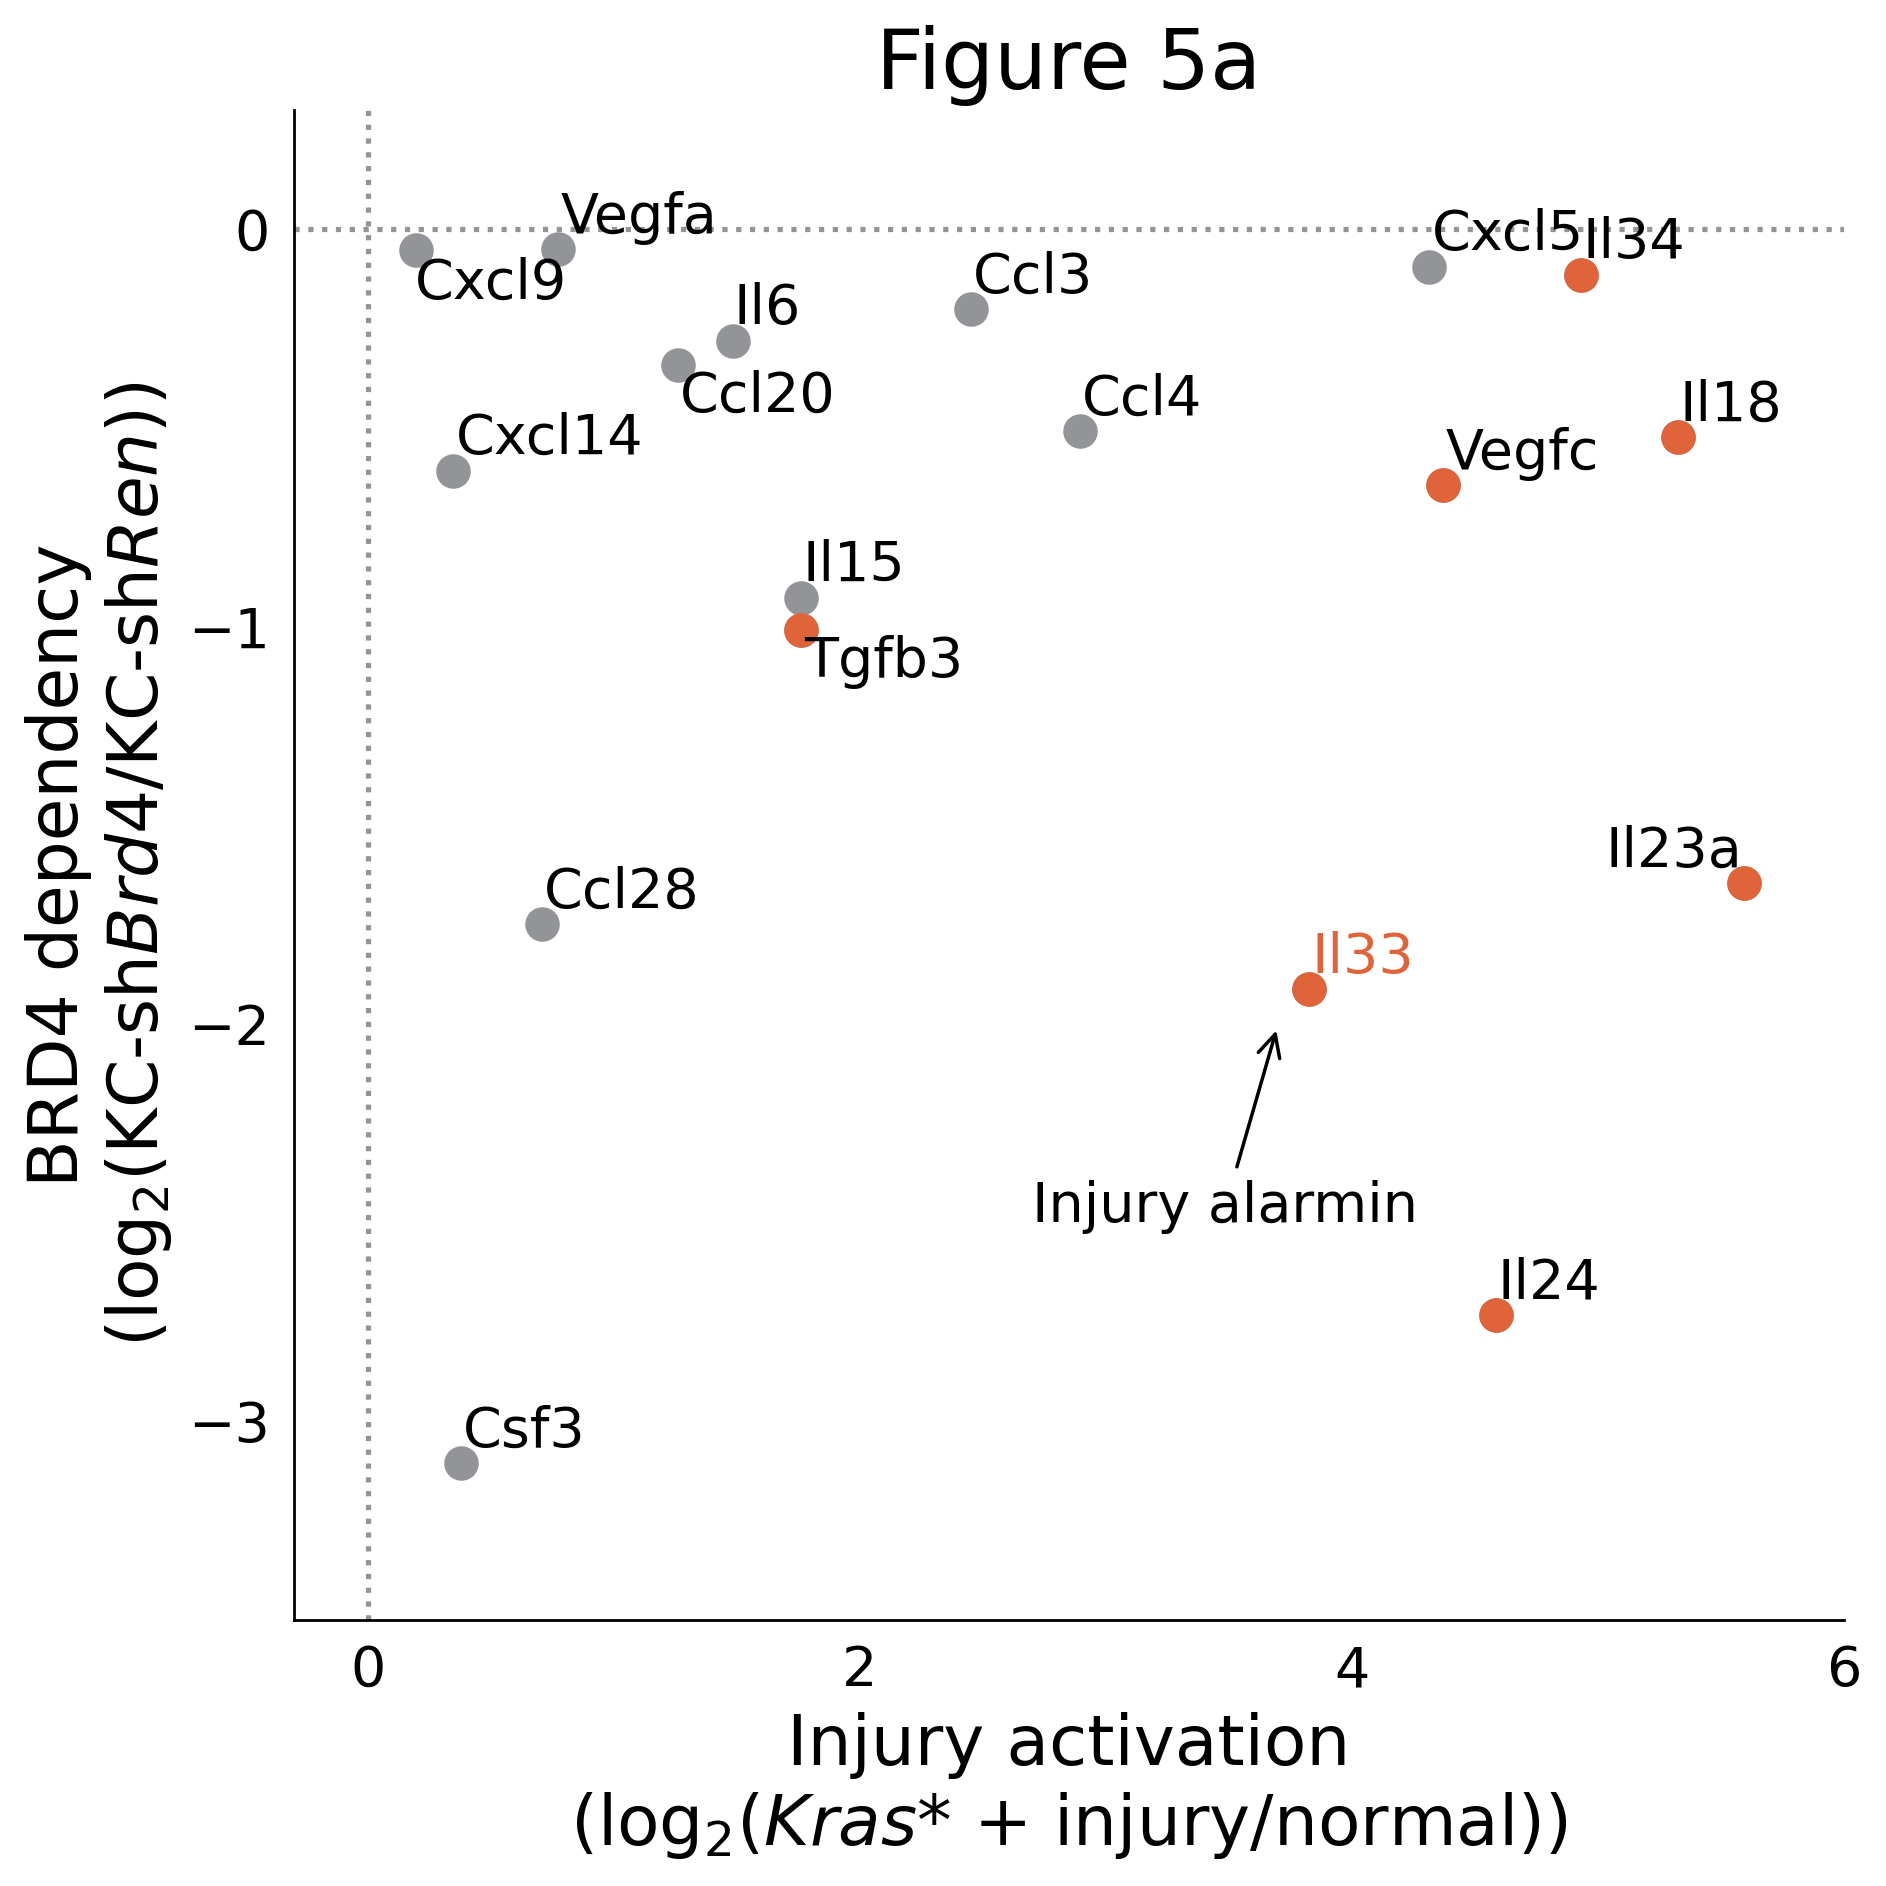

In [21]:
x = merge['log2FoldChangeKras'].tolist()
y = merge['log2FoldChangeBrd4'].tolist()
x1 = specific['log2FoldChangeKras'].tolist()
y1 = specific['log2FoldChangeBrd4'].tolist()
gene = merge['gene'].tolist()
plt.subplots(figsize = (8,8), dpi = 250)
plt.scatter(x, y, s = 80, color = "#939497")
plt.scatter(x1, y1, s = 80, color = "#DF6439")
text = []
for i in range(len(x)):
    if gene[i] == "Il33":
        text.append(plt.annotate(gene[i], (x[i], y[i]), color = "#DF6439",fontsize= 16))
    else:
        text.append(plt.annotate(gene[i], (x[i], y[i]), color = "black",fontsize= 16))
adjust_text(text)

plt.annotate('Injury alarmin', xy=(3.7, -2.0), xytext=(2.7, -2.5),fontsize= 16,
            arrowprops=dict(arrowstyle='->'),
            )
plt.xlim([-0.3,6])
plt.ylim([-3.5,0.3])
plt.xticks(size = 16, ticks = [0,2,4,6])
plt.yticks(size = 16, ticks = [0,-1,-2,-3])
plt.xlabel('Injury activation\n$(\log_{2}$($Kras$* + injury/normal))',size=20)
plt.ylabel('BRD4 dependency\n$(\log_{2}$(KC-sh$Brd4$/KC-sh$Ren$))',size=20)
plt.title('Figure 5a', size=24)
plt.axvline(x=0, color='#939497', linestyle='dotted')
plt.axhline(y=0, color='#939497', linestyle='dotted')
plt.tick_params(left=False, bottom=False)

plt.gca().spines['right'].set_color('none')
plt.gca().spines['top'].set_color('none')
plt.show()

### python and package' version

In [22]:
!python --version
!pip show adjustText
!pip show pandas
!pip show matplotlib

Python 3.10.2
Name: adjustText
Version: 0.7.3
Summary: Iteratively adjust text position in matplotlib plots to minimize overlaps
Home-page: https://github.com/Phlya/adjustText
Author: Ilya Flyamer
Author-email: flyamer@gmail.com
License: UNKNOWN
Location: /Users/haoranzhang/miniconda3/envs/scRNAseq/lib/python3.10/site-packages
Requires: matplotlib, numpy
Required-by: 
Name: pandas
Version: 1.4.2
Summary: Powerful data structures for data analysis, time series, and statistics
Home-page: https://pandas.pydata.org
Author: The Pandas Development Team
Author-email: pandas-dev@python.org
License: BSD-3-Clause
Location: /Users/haoranzhang/miniconda3/envs/scRNAseq/lib/python3.10/site-packages
Requires: numpy, python-dateutil, pytz
Required-by: anndata, scanpy, seaborn, statsmodels
Name: matplotlib
Version: 3.5.2
Summary: Python plotting package
Home-page: https://matplotlib.org
Author: John D. Hunter, Michael Droettboom
Author-email: matplotlib-users@python.org
License: PSF
Location: /Users/ha